# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_data.shape)
print(df_data.head(2))

(4324, 9)
   Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  


In [7]:
print(df_data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [8]:
print(df_data.isna().values.any())

True


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [10]:
df_data.duplicated().values.any()

False

In [11]:
clean_df = df_data.drop("Price", axis=1)
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Mission_Status  4324 non-null   object
dtypes: int64(2), object(6)
memory usage: 270.4+ KB
None


## Descriptive Statistics

In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Mission_Status  4324 non-null   object
dtypes: int64(2), object(6)
memory usage: 270.4+ KB


In [13]:
clean_df.describe()

,Unnamed: 0,Unnamed: 0.1
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
clean_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Mission_Status'],
      dtype='object')

In [15]:
launch_by_org = clean_df.groupby("Organisation").agg({"Detail": pd.Series.count})

In [16]:
launch_by_org.sort_values("Detail", inplace=True)

In [17]:
launch_by_org.head()

,Detail
Organisation,
Khrunichev,1
Virgin Orbit,1
Starsem,1
Sandia,1
OneSpace,1


In [18]:
plt.figure(figsize=(5, 10), dpi=150)

fig = px.bar(
    x=launch_by_org.Detail[-20:], 
    y=launch_by_org.index[-20:], 
    color=launch_by_org.Detail[-20:],
    )

fig.update_layout(title="Top 20 Organisation by number of space launch",
                  xaxis_title="Organisation",
                  yaxis_title="Number of launches")

fig.show()

<Figure size 750x1500 with 0 Axes>

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [19]:
rocket_status = clean_df.value_counts("Rocket_Status")
rocket_status

Rocket_Status
StatusRetired    3534
StatusActive      790
dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [20]:
mission_status = clean_df.value_counts("Mission_Status")
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
dtype: int64

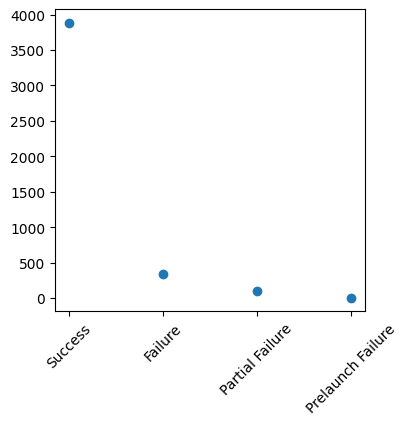

In [21]:
plt.figure(figsize=(4, 4), dpi=100)

plt.scatter(x=mission_status.index, y=mission_status.values)
plt.xticks(rotation=45)
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [22]:
prices = df_data.Price
prices.shape

(4324,)

In [23]:
prices.dropna(inplace=True)

In [24]:
prices.shape


(964,)

In [25]:
prices.head()

0     50.0
1    29.75
3     65.0
4    145.0
5    64.68
Name: Price, dtype: object

In [26]:
plt.figure(figsize=(4, 8), dpi=150)

fig = px.histogram(prices, x=prices.values)
fig.show()

<Figure size 600x1200 with 0 Axes>

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Mission_Status  4324 non-null   object
dtypes: int64(2), object(6)
memory usage: 270.4+ KB


In [28]:
clean_df.Location[:5]

0           LC-39A, Kennedy Space Center, Florida, USA
1    Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                        Pad A, Boca Chica, Texas, USA
3         Site 200/39, Baikonur Cosmodrome, Kazakhstan
4             SLC-41, Cape Canaveral AFS, Florida, USA
Name: Location, dtype: object

In [29]:
country = clean_df.Location.astype(str).str.split(",").str[-1]
country.head(10)

0            USA
1          China
2            USA
3     Kazakhstan
4            USA
5          China
6     Kazakhstan
7          China
8            USA
9          Japan
Name: Location, dtype: object

In [30]:
clean_df["country"] = clean_df.Location.astype(str).str.split(",").str[-1].str.strip()

In [31]:
clean_df[clean_df.country == "New Mexico"]

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,country
91,91,91,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Oct 26, 2019 17:40 UTC",SARGE | Launch 4,StatusActive,Failure,New Mexico
127,127,127,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Jun 29, 2019 18:00 UTC",SARGE | Launch 3,StatusActive,Partial Failure,New Mexico
157,157,157,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Mar 02, 2019 17:45 UTC",SARGE | Launch 2,StatusActive,Partial Failure,New Mexico
219,219,219,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Aug 25, 2018 18:15 UTC",SARGE | Launch 1,StatusActive,Partial Failure,New Mexico


In [32]:
clean_df.country = clean_df.country.astype(str).str.replace("Russia", "Russian Federation").replace("New Mexico", "USA")
clean_df.country = clean_df.country.astype(str).str.replace("Yellow Sea", "China").replace("Shahrud Missile Test Site", "Iran").replace("Pacific Missile Range Facility", "USA").replace("Barents Sea", "Russian Federation").replace("Gran Canaria", "USA")

In [33]:
clean_df[clean_df.country == "Yellow Sea"]

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,country


In [34]:
launch_by_country = clean_df.country.value_counts()
# launch_by_country.index = launch_by_country.index.astype(str).str.upper()
launch_by_country

Russian Federation    1398
USA                   1351
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Pacific Ocean           36
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
South Korea              3
Brazil                   3
Name: country, dtype: int64

In [35]:
launch_by_country.index

Index(['Russian Federation', 'USA', 'Kazakhstan', 'France', 'China', 'Japan',
       'India', 'Pacific Ocean', 'Iran', 'New Zealand', 'Israel', 'Kenya',
       'Australia', 'North Korea', 'South Korea', 'Brazil'],
      dtype='object')

In [36]:
launch_by_country = pd.DataFrame({"country": launch_by_country.index, "launch": launch_by_country.values})
launch_by_country.drop(7, inplace=True)
launch_by_country

,country,launch
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
8,Iran,14
9,New Zealand,13
10,Israel,11


In [37]:
launch_by_country.country = launch_by_country.country.astype(str).str.replace("Iran", "IRAN, ISLAMIC REPUBLIC OF")

In [38]:
%pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=c3a46d30c31b4dd42d0f7900a2d8e7aced37ed55a0a804b6bc76fd4c419451dd
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [39]:
import pycountry

In [40]:
for ind in launch_by_country.index:
  code = pycountry.countries.get(name=launch_by_country.country[ind])
  if code:
    launch_by_country.country[ind] = code.alpha_3
  else:
    launch_by_country.drop(ind, inplace=True)

<ipython-input-40-b49f8d4bd528>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
launch_by_country

,country,launch
0,RUS,1398
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
8,IRN,14
9,NZL,13
10,ISR,11
11,KEN,9


In [42]:
plt.figure(figsize=(4,8), dpi=150)

fig = px.choropleth(launch_by_country, locations=launch_by_country.country, color=launch_by_country.launch)

fig.show()

<Figure size 600x1200 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [43]:
clean_df.head(2)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China


In [63]:
country_by_success = clean_df.groupby(["country", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})
country_by_success.country = country_by_success.country.astype(str).str.replace("Iran", "IRAN, ISLAMIC REPUBLIC OF")
successful_launch = country_by_success[country_by_success.Mission_Status == "Success"]
successful_launch.drop("Mission_Status", axis=1, inplace=True)
successful_launch.rename(columns={"Detail": "Success"}, inplace=True)
successful_launch

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,Success
1,Australia,3
6,China,244
9,France,285
12,India,63
15,"IRAN, ISLAMIC REPUBLIC OF",5
17,Israel,9
20,Japan,113
24,Kazakhstan,608
25,Kenya,9
27,New Zealand,11


In [64]:
for ind in successful_launch.index:
  code = pycountry.countries.get(name=successful_launch.country[ind])
  if code:
    successful_launch.country[ind] = code.alpha_3
  else:
    successful_launch.drop(ind, inplace=True)

successful_launch

<ipython-input-64-e1d00802142b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,Success
1,AUS,3
6,CHN,244
9,FRA,285
12,IND,63
15,IRN,5
17,ISR,9
20,JPN,113
24,KAZ,608
25,KEN,9
27,NZL,11


In [70]:
success_launch_by_country = pd.merge(successful_launch, launch_by_country, on="country")
success_launch_by_country.head()

,country,Success,launch
0,AUS,3,6
1,CHN,244,269
2,FRA,285,303
3,IND,63,76
4,IRN,5,14


In [68]:
plt.figure(figsize=(4, 8), dpi=150)

fig = px.choropleth(
    success_launch_by_country,
    locations="country",
    color="Success",
    title="Launch success of different countries"
)

fig.show()

<Figure size 600x1200 with 0 Axes>

In [69]:
plt.figure(figsize=(4, 8), dpi=150)

fig = px.choropleth(
    success_launch_by_country,
    locations="country",
    color=success_launch_by_country.launch - success_launch_by_country.Success,
    title="Launch failure of different countries"
)

fig.show()

<Figure size 600x1200 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [72]:
clean_df.head(3)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success,USA


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 